In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_evaluation.csv')

In [3]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   outcome   1728 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [5]:
df.shape

(1728, 7)

In [6]:
df['outcome'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: outcome, dtype: int64

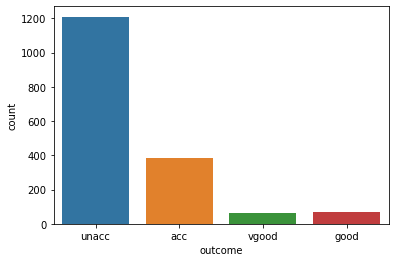

In [7]:
sns.countplot(data=df, x='outcome')
plt.show()

In [8]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [10]:
for col in ['buying', 'maint', 'lug_boot', 'safety']:
    df[col] = le.fit_transform(df[col])

In [11]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,3,3,2,2,2,1,unacc
1,3,3,2,2,2,2,unacc
2,3,3,2,2,2,0,unacc
3,3,3,2,2,1,1,unacc
4,3,3,2,2,1,2,unacc


In [12]:
X = df.drop('outcome', axis=1)

y = df['outcome']

In [13]:
X.head(), y.head()

(   buying  maint  doors  persons  lug_boot  safety
 0       3      3      2        2         2       1
 1       3      3      2        2         2       2
 2       3      3      2        2         2       0
 3       3      3      2        2         1       1
 4       3      3      2        2         1       2,
 0    unacc
 1    unacc
 2    unacc
 3    unacc
 4    unacc
 Name: outcome, dtype: object)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 47)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1209, 6), (1209,), (519, 6), (519,))

In [16]:
y_train.value_counts()

unacc    848
acc      264
good      50
vgood     47
Name: outcome, dtype: int64

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
preds = knn.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.9017341040462428

In [21]:
pd.crosstab(y_test, preds)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,100,1,19,0
good,9,9,0,1
unacc,13,0,349,0
vgood,8,0,0,10


In [22]:
from sklearn.metrics import classification_report


In [23]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         acc       0.77      0.83      0.80       120
        good       0.90      0.47      0.62        19
       unacc       0.95      0.96      0.96       362
       vgood       0.91      0.56      0.69        18

    accuracy                           0.90       519
   macro avg       0.88      0.71      0.77       519
weighted avg       0.90      0.90      0.90       519



In [26]:
#pip install imblearn

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [29]:
y_train.value_counts()

unacc    848
acc      264
good      50
vgood     47
Name: outcome, dtype: int64

In [30]:
y_train_smote.value_counts()

unacc    848
acc      848
good     848
vgood    848
Name: outcome, dtype: int64

In [31]:
knn2 = KNeighborsClassifier()

In [32]:
knn2.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [34]:
preds2 = knn2.predict(X_test)

In [35]:
accuracy_score(y_test, preds2)

0.8554913294797688

In [36]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

         acc       0.66      0.86      0.75       120
        good       0.56      0.74      0.64        19
       unacc       0.97      0.87      0.92       362
       vgood       0.86      0.67      0.75        18

    accuracy                           0.86       519
   macro avg       0.76      0.78      0.76       519
weighted avg       0.88      0.86      0.86       519

